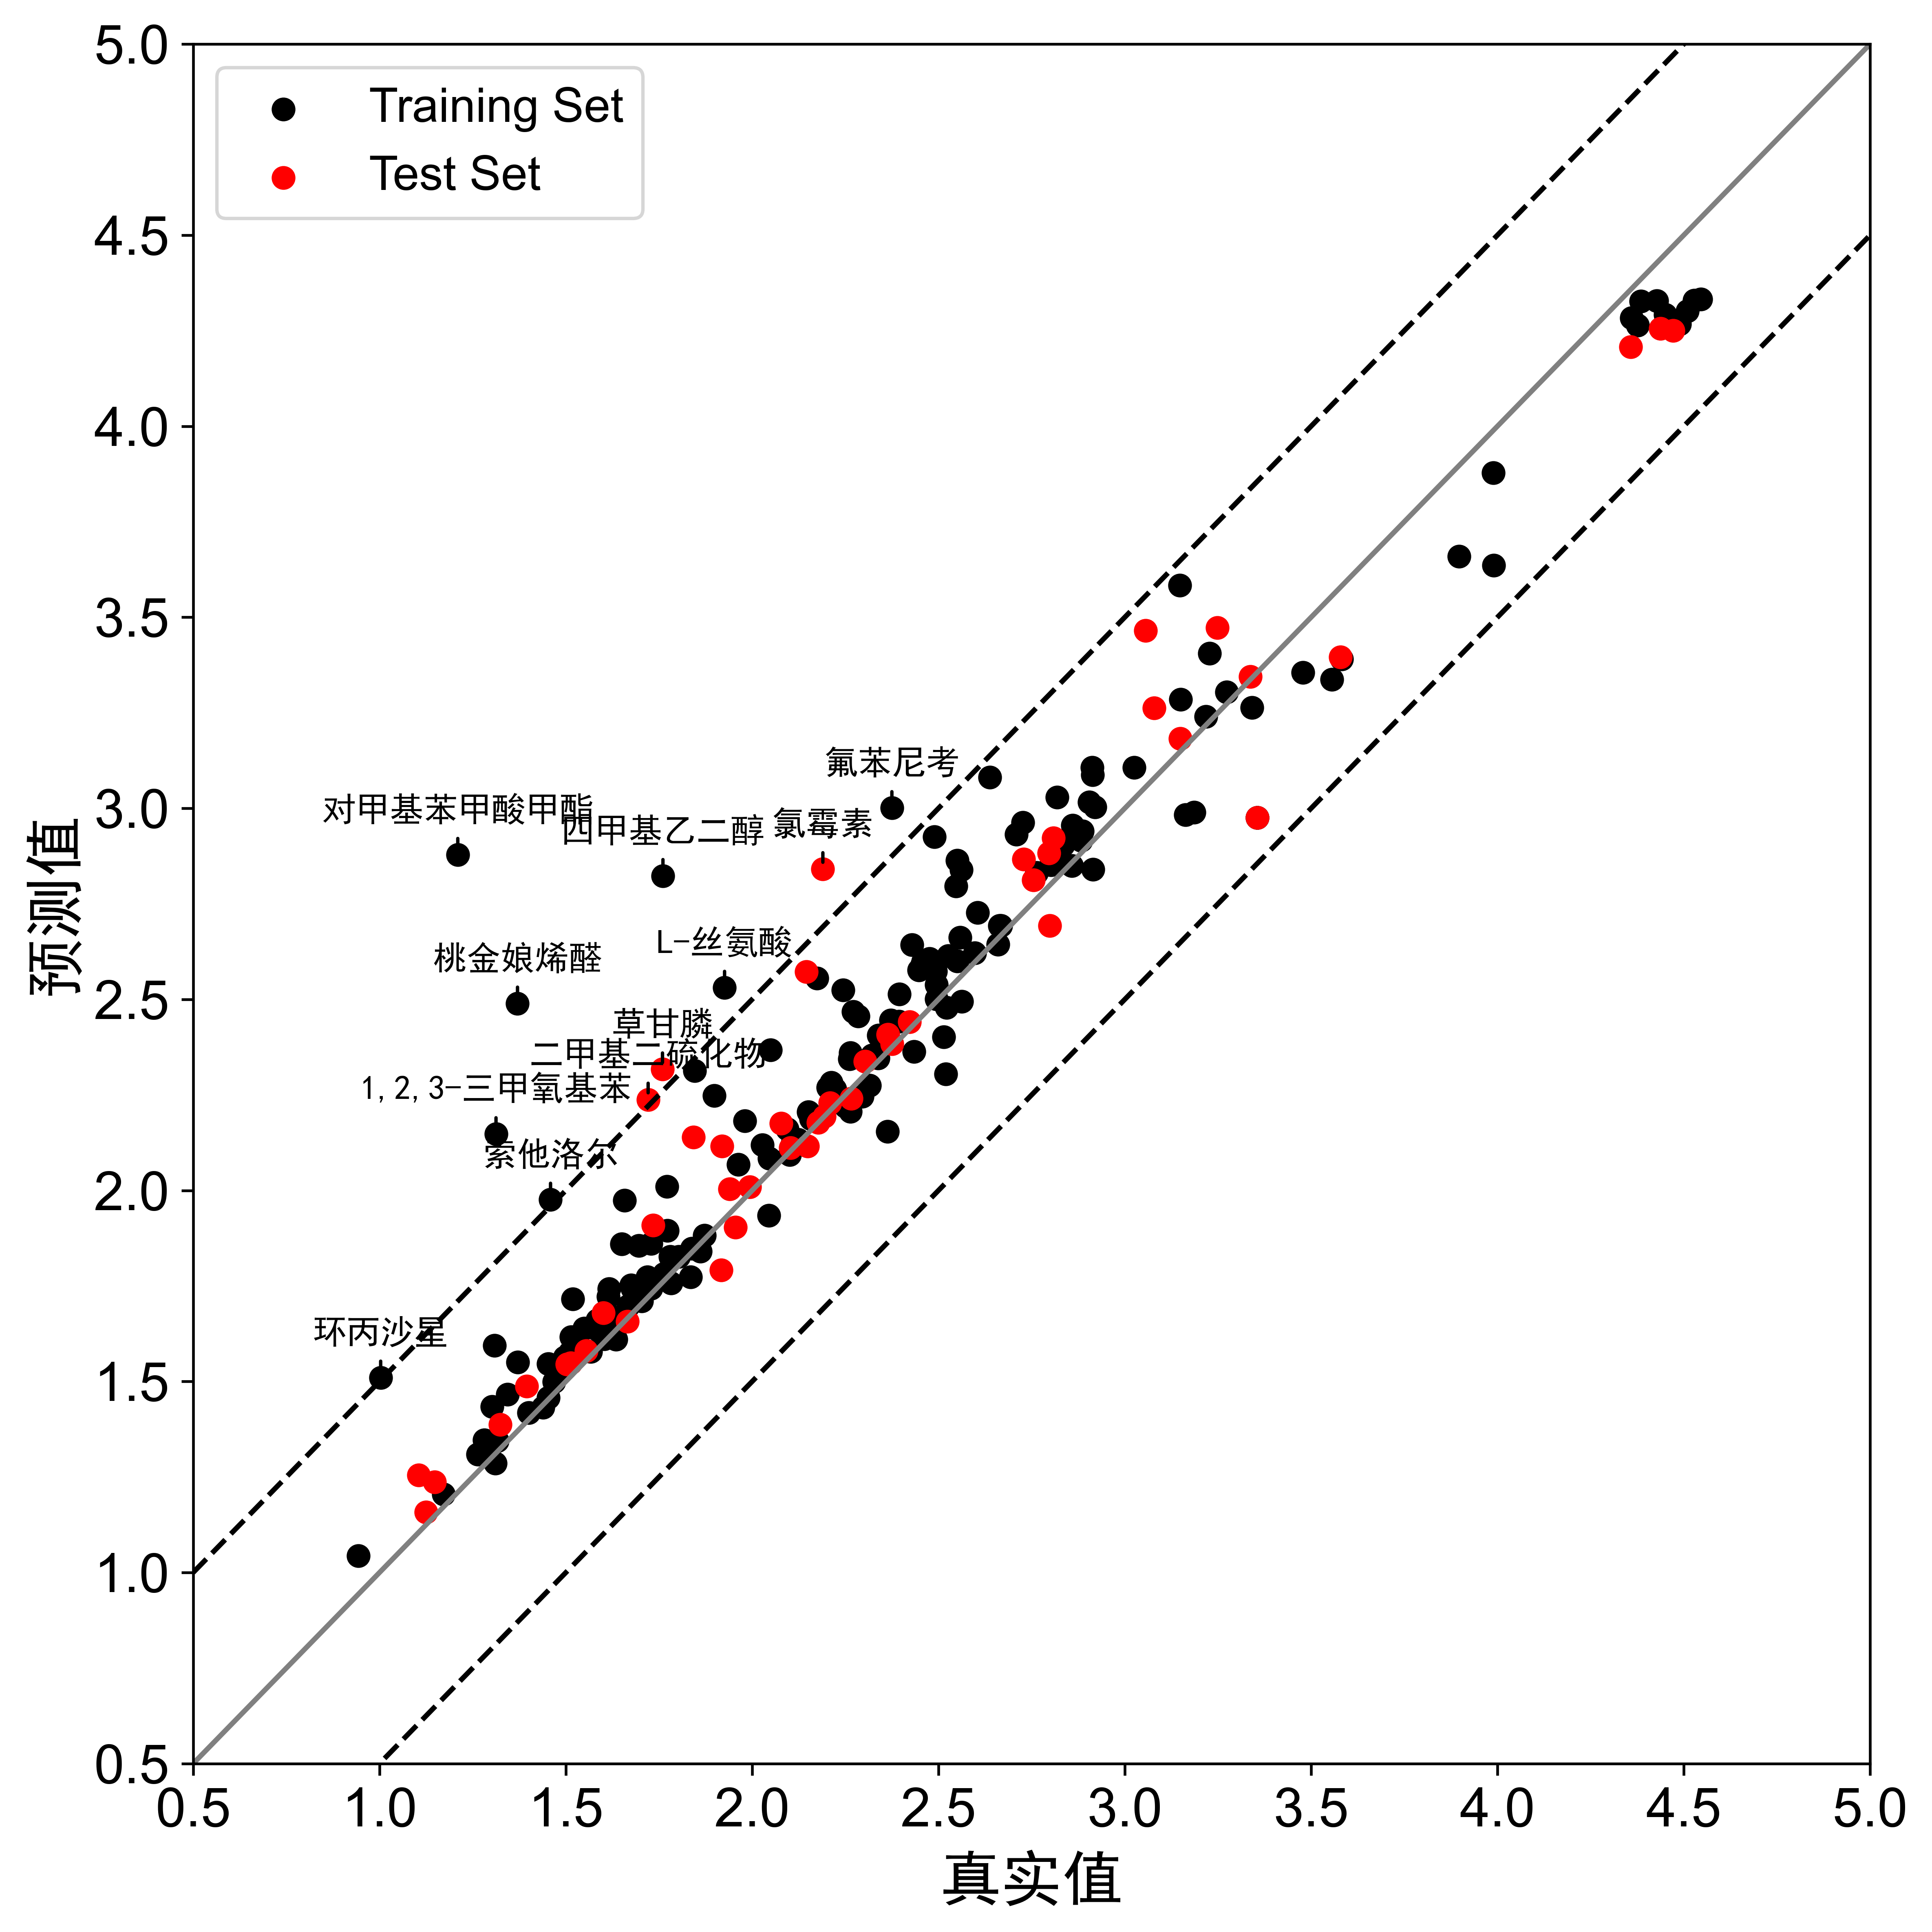

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 函数：根据模型计算预测值
def model_prediction(ehumo):
    return -27.21 * ehumo - 4.5

# 加载数据
train_data_path =  'C:/Users/k/Desktop/硕士论文/ORP/ORP4/ORP_quantum_train.xlsx'
test_data_path =  'C:/Users/k/Desktop/硕士论文/ORP/ORP4/ORP_quantum_test.xlsx'
train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)

# 计算预测值
train_data['Predicted E'] = model_prediction(train_data['EHUMO'])
test_data['Predicted E'] = model_prediction(test_data['EHUMO'])

# 计算误差并筛选出误差大于0.5的点
train_data['Error'] = abs(train_data['E'] - train_data['Predicted E'])
test_data['Error'] = abs(test_data['E'] - test_data['Predicted E'])
high_error_train = train_data[train_data['Error'] > 0.5]
high_error_test = test_data[test_data['Error'] > 0.5]

# 创建散点图，真实值作为 x 轴，预测值作为 y 轴
plt.figure(figsize=(8, 8))

# 训练集
plt.scatter(train_data['E'], train_data['Predicted E'], color='black', label='Training Set')

# 测试集
plt.scatter(test_data['E'], test_data['Predicted E'], color='red', label='Test Set')

# 添加完美预测线
plt.plot([0.5, 5.0], 
         [0.5, 5.0], 
         'gray', linestyle='-')
plt.plot([0.5, 5.0], [0.5-0.5, 5.0-0.5], linestyle='--', color='black')
plt.plot([0.5, 5.0], [0.5+0.5, 5.0+0.5],linestyle='--', color='black')

# 创建一个CID到自定义标签的映射（例如化合物名称）
# 示例：cid_to_label = {637566: '化合物A', 6404: '化合物B', ...}
# 创建CID到化合物名称的映射
cid_to_label = {
    6425: '四甲基乙二醇',
    154342: '对甲基苯甲酸甲酯',
    61130: '桃金娘烯醛',
    2764: '环丙沙星',
    12462: '1,2,3-三甲氧基苯',
    5951: 'L-丝氨酸',
    5253: '索他洛尔',
    114811: '氟苯尼考',
    12232: '二甲基二硫化物',
    3496: '草甘膦',
    5959: '氯霉素'
}


# 标注函数
def annotate_points(data, ax):
    for _, row in data.iterrows():
        if row['Error'] > 0.5 and row['CID'] in cid_to_label:
            label = cid_to_label[row['CID']]
            ax.annotate(label, (row['E'], row['Predicted E']), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="-"))

# 标注误差大于0.5的点
ax = plt.gca()
annotate_points(train_data, ax)
annotate_points(test_data, ax)

# 设置坐标轴标签
plt.xlim(0.5,5.0)
plt.ylim(0.5,5.0)
plt.xlabel('真实值',fontsize=18)
plt.ylabel('预测值',fontsize=18)
plt.yticks(fontproperties = 'Arial', size = 16)
plt.xticks(fontproperties = 'Arial', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
bwith = 5 #边框宽度设置为2
plt.rcParams['figure.dpi']=600
plt.legend(prop={'family' : 'Arial', 'size'   : 14})

plt.tight_layout()

# 显示图表
plt.show()
